# Beta

## Finding $ \beta$
  
 $\beta$ in statistical terms is the slope of the least squares regression line of the daily returns of the stock market versus the daily returns of the specific stock we are looking for. What $\beta$ tells you is for a one percentage increase of the stock market, you will get an increase of $\beta$% in that specific stock. For the sake of this example we will be using Ford as our particular stock. Beta is a measure of volatility, which is good for seeing how stock prices change with the stock market.
 
 $\beta$ Is measured by taking the covariance of the daily returns of the stock market and the Ford divided over the variance of the return of the stock market. Here is the formula for $\beta$.
 
 $$ \beta = \frac{Cov(R_m, R_T)}{Var(R_m)}$$ 

In which $R_T$ is the daily return percentage of Ford and $R_m$ the return percentage of the S&P 500.


We are first going to find beta using the formula mentioned above, and afterwards we are going to use a linear regression to calculate beta.

In order to find $\beta$ in python we are going to load the following python libraries:



In [42]:
#For Time and Dates
import datetime as dt

#For plotting
import matplotlib.pyplot as plt
from matplotlib import style

#For Data Wrangling
import pandas as pd 
import numpy as np

#For Web Scrapping
import pandas_datareader.data as web

We are going to mainly use `pandas` and `datetime` to load stock data from yahoo using `pandas_datareader`.

In [43]:
start=dt.datetime(2000,1,1).date() #earliest value
end=pd.to_datetime("today").date() #latest value
company="F" #change this if you want to see another company
df =web.DataReader(company,'yahoo',start,end)
def rename_columns(df,company):
    ''' This creates a dictionary of the old names with the corresponding new ones'''
    return {i:"{0:} {1:}".format(i,company) for i in df.columns}
df = df.rename(index=str, columns=rename_columns(df,company))##Creates new values
df.index = pd.to_datetime(df.index)#Gets rid of the minutes of the index

Now we are going to calculate daily returns by using this simple equation:

$ \frac{Todays \ Adj. \ Close \ -  Yesterdays \ Adj. \ Close}{ Yesterdays \ Adj. \ Close} $

In [44]:
df.head() #here we see the data that we have 

,High F,Low F,Open F,Close F,Volume F,Adj Close F
Date,,,,,,
2000-01-03,29.228899,28.645008,28.988474,28.782394,4056600.0,15.603897
2000-01-04,28.713701,27.648958,28.473276,27.820692,7322400.0,15.082524
2000-01-05,28.301542,27.889385,28.026772,27.923731,5038200.0,15.138391
2000-01-06,28.473276,27.683306,28.026772,27.958078,4544900.0,15.157002
2000-01-07,30.224949,28.645008,28.851088,30.018869,9266000.0,16.274221


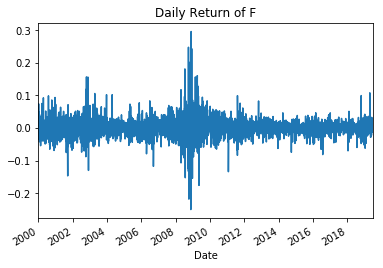

In [45]:
%matplotlib inline
df["Daily Return {:}".format(company)]=(df["Adj Close {:}".format(company)]-df["Adj Close {:}".format(company)].shift(1))/df["Adj Close {:}".format(company)].shift(1)
df["Daily Return {:}".format(company)].plot(title="Daily Return of {:}".format(company))


In [46]:
print("This is the daily return for {:}. Next We find the daily return for the S&P 500".format(company))

This is the daily return for F. Next We find the daily return for the S&P 500


In [47]:
stock_market="SPY"
df_stock_market = web.DataReader(stock_market,'yahoo',start,end)
df_stock_market=df_stock_market.rename(index=str, columns=rename_columns(df_stock_market,stock_market))
df_stock_market.index = pd.to_datetime(df_stock_market.index)
df_stock_market.head()

,High SPY,Low SPY,Open SPY,Close SPY,Volume SPY,Adj Close SPY
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.934494
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.987312
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,97.160843
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.599319
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,101.151367


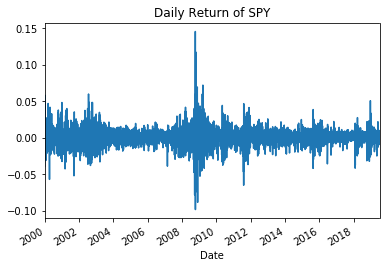

In [48]:
df_stock_market["Daily Return {:}".format(stock_market)] = (df_stock_market["Adj Close {:}".format(stock_market)]-df_stock_market["Adj Close {:}".format(stock_market)].shift(1))/df_stock_market["Adj Close {:}".format(stock_market)].shift(1)
df_stock_market.index = pd.to_datetime(df_stock_market.index)
df_stock_market["Daily Return {:}".format(stock_market)].plot(title="Daily Return of {:}".format(stock_market))


This is the daily return of the S&P 500.

### Finding the covariance 



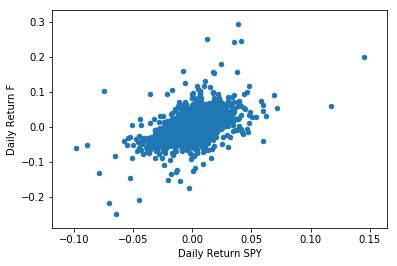

In [49]:
merged=pd.concat([df,df_stock_market],axis=1,join_axes=[df_stock_market.index])
merged=merged.dropna()
merged.plot.scatter(x="Daily Return {:}".format(stock_market),y="Daily Return {:}".format(company))

This scatter plot shows that there is some relation between the movements of the stockmarket and the movements of Tesla. Notice how the the middle cluster of the data looks like a stretched out football? This is what we expect to see when there is no underlying pattern. This topic will be covered in another notebook.


#### Covariance and Variance Values 

We are going to use numpy's covariance function `numpy.cov` to get a matrix of variance values which give you the corresponding variances. 
$ X_{ij}$ gives you the Variance of the i row with the corresponding j column which happen to be made out of our two columns of the daily return of Ford (F) and the S&P 500. 

In [50]:
cov=np.cov(merged["Daily Return {:}".format(stock_market)],merged["Daily Return {:}".format(company)])
print(cov)##This is the covariance matrix
var_of_stock_market=cov[0][0]
covar=cov[0][1]
print(var_of_stock_market)

[[0.00014481 0.00016608]
 [0.00016608 0.00069049]]
0.00014481005953076833


Now that we have all the values we compute $\beta$

In [51]:
beta=covar/var_of_stock_market
print("beta is equal to {0:.4f}".format(beta))

beta is equal to 1.1469


## Checking Our Results Using Linear Regression

We are going to use a linear regression line to compare the results.

In [52]:
#For statistical tools
import statsmodels.api as sm

In [53]:
X=sm.add_constant(merged["Daily Return {:}".format(stock_market)])
Y=merged["Daily Return {:}".format(company)]
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\sespejog\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Daily Return F   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:16:00   Log-Likelihood:                 11687.
No. Observations:                4907   AIC:                        -2.337e+04
Df Residuals:                    4905   BIC:                        -2.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.857e-05      0.000     -0.246      0.806      -0.001       0.001
Daily Return SPY     1.1469      0.027     43.226      0.000       1.095       1.199
==============================================================================
Omnibus:                     1656.439   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59895.685
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                      20.013   Cond. No.                         83.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""